# Wrangle and Analyze data project ( WeRateDogs twitter account )

### Table of contents 

* Introduction
* Gathering Data 
* Assessing Data
* Cleaning Data 
* deriving insights from data
* References

### Introduction 

In this Project , we will deal with data set from real world , which is the WeRateDogs twitter account archive , this account is very popular for giving ratings for the pictures of dogs ,we will gather this data from different files and from the twitter api also , and because real data always comes in a messy and dirty state , so we will assess this data and clean it and store it in a file for anyone to use and review our projects .

At the end we will derive insights from this cleaned data by using exploratory analysis and drawing some visualizations for our results .

### Gathering data

In this section , we will gather data from different resources like : 
* CSV files - The twitter_archive_enhanced.csv file was provided to me
* TSV files - The image-predictions.tsv file will be downloaded programitically 
* APIs - Using Python's Tweepy library to access Twitter API  

In [191]:
#import numpy and pandas 
import numpy as na
import pandas as pd 
import requests

Gathering CSV files

In [192]:
#reading the csv file twitter archive
twitter_Archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Gathering TSV files 

In [193]:
#downloading the file Programmatically using requests lib 
#The url was given to us in the classroom 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
imagesFile = requests.get(url)

In [194]:
#write the contents of the data into a tsv file 
open('imagePredictions.tsv', 'wb').write(imagesFile.content)

335079

In [195]:
#reading the tsv file image predections
Image_predections = pd.read_csv('imagePredictions.tsv',sep='\t')
Image_predections

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Gathering data from twitter API

The steps to query data from twitter api are as follow :  
1- get a developer account from twitter. <br />
2- use the account credentials to set an access token to open a connection with the api. <br />
3- query the api to get the data for the tweets which we have their IDs in the archive file. <br />
4- The data is in json format , we store this data in a txt file .<br />
5- we open the file and get the needed information from it using the key name. <br />

**Unfortunately Twitter has denied my request for a developer account for an unknown reason , so a Udacity Mentor told me to use the json file in the resources file instead and read ir line by line**

In [270]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_Archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

**We will read the content of tweet json file line by line to extract its data**

In [197]:
#we will just read the file tweet json file 
tweetJsonFile = pd.read_json('tweet-json',lines=True)
tweetJsonFile

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [198]:
#we need only 3 columns which are id , favorite_count, retweet_count
tweetsDataApi_df = tweetJsonFile[['id', 'favorite_count', 'retweet_count']]
tweetsDataApi_df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


#### So untill now we finished gathering data , we will move to the Assessing data phase 

### Assessing data

Here we are going to assess data both visually and programmatically to search fro tidness issues and quality issues 

Quality issues : 
* Completeness
* Validity 
* Accuracy 
* Consistency 

Tidness issues:
* Each column represents a variable
* Each row represents an observation
* Each table represents an observational unit

#### First Assess twitter_Archive dataframe

In [199]:
#show the dataframe
twitter_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [200]:
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [201]:
twitter_Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [202]:
twitter_Archive[twitter_Archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [203]:
twitter_Archive[twitter_Archive.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [204]:
twitter_Archive[twitter_Archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [205]:
twitter_Archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Cedrick      1
Kona         1
Bloop        1
Jaycob       1
Maisey       1
Name: name, Length: 957, dtype: int64

In [206]:
twitter_Archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [207]:
twitter_Archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [208]:
twitter_Archive[twitter_Archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Issues in twitter_Archive dataframe 

Quality Issues : 
* There are some retweeted tweets and we only care with original tweets
* Time stamp is string and not a date time format 
* Some columns we will not use them in our analysis like 'in_reply_to_status_id,in_reply_to_user_id,source'
* The denominator has some values other than 10 althought it must be a constant number equals 10
* The numerator has some values not mapped correctly to the value in the tweet speciallly when the rating conatins decimal value 
* The numerator has some values less than 10 which contradicts with the rule of the account rating that they "they are good   dogs Brent." , and some other valuea are very large that seems to be not reasonable for example 1776 
* some names of the dogs are missing and written 'None' aand some maybe Typos and written 'a' or some other words that begin with small letters like 'one' , 'officially'..etc.
* The rating numertor is of type int and should be converted to float because some ratings have floating point 

  

Tidness Issues : 
* There are 4 columns at the end which represent the stage of the dog (doggo,floofer,pupper,puppo) these columns represent the same variable and must be converted to the one column only


#### Second Assess Image_predections dataframe

In [209]:
Image_predections

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [210]:
Image_predections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [211]:
Image_predections.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [212]:
Image_predections[Image_predections.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [213]:
Image_predections[Image_predections.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [214]:
Image_predections.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
basketball              1
harp                    1
Scotch_terrier          1
polecat                 1
African_grey            1
Name: p1, Length: 378, dtype: int64

Quality Issues : 
* There are duplicated image URLs corresponding to different tweets id 
* some columns won't be used in analysis and can be dropped after cleaning duplicates like 'jpg_url'



Tidness Issues : 
* This dataframe can be merged with twitter_Archive dataframe as they form the same observational unit


#### Third Assess tweetsDataApi_df dataframe

In [215]:
tweetsDataApi_df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [216]:
tweetsDataApi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [217]:
tweetsDataApi_df.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [218]:
tweetsDataApi_df[tweetsDataApi_df.id.duplicated()]

,id,favorite_count,retweet_count


Quality Issues : 
* No quality issues found


Tidness Issues : 
* This dataframe can be merged with twitter_Archive dataframe as they form the same observational unit

### Cleaning data

#### In this section we will clean the issues that we found in the Assessing phase 

Cleaning has 3 steps :
* Define
* Code
* Test

First of all we will take a copy of the original datasets 

In [219]:
twitter_Archive_clean = twitter_Archive.copy()
Image_predections = Image_predections.copy()
tweetsDataApi_df = tweetsDataApi_df.copy()

##### 1-Define

The rating_numerator column is of type int and it is supposed to be converted to float type

##### 1-Code

In [220]:
twitter_Archive_clean['rating_numerator'] = twitter_Archive_clean['rating_numerator'].astype(float)

##### 1-Test

In [221]:
twitter_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### 2-Define

some values in the rating numerator is not right , when the rating is a decimal value in the tweet 

##### 2-Code

we will get the tweets which have decimal ratings and then correct the numerator 

In [222]:
#we will use regex formula to get the tweets which have decimal rating
twitter_Archive_clean[twitter_Archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Anaconda\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [223]:
import re
listOfIndex = [45,340,695,763,1689,1712] #indices of the tweets 
for index in listOfIndex :
    tweetText = twitter_Archive_clean.iloc[index]['text']
    rating = re.findall(r"(\d+\.\d*\/\d+)",tweetText) #extract the rating
    ratingNumber = float(rating[0][:-3])  #get the numerator only and convert it to float
    twitter_Archive_clean.at[index,'rating_numerator'] = ratingNumber #assign the value to the numerator

##### 2-Test

In [224]:
twitter_Archive_clean[twitter_Archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Anaconda\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


##### 3-Define

since we want the original tweets only , we will delete any row whose column 'retweeted_status_id' not equal Nan

##### 3-Code

In [225]:
twitter_Archive_clean = twitter_Archive_clean.query("retweeted_status_id == 'NaN'")

##### 3-Test

In [226]:
# must result in zero rows 
twitter_Archive_clean.query("retweeted_status_id != 'NaN'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### 4-Define

Some columns need to be dropped because they are incomplete and we will not use them in our analysis , These columns are in twitter_Archive dataframe are :
(in_reply_to_status_id - in_reply_to_user_id - source - retweeted_status_id - retweeted_status_user_id - retweeted_status_timestamp - expanded_urls)              
      
                     

##### 4-Code

In [227]:
twitter_Archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis = 1,inplace = True)

##### 4-Test

In [228]:
twitter_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   int64  
 5   name                2175 non-null   object 
 6   doggo               2175 non-null   object 
 7   floofer             2175 non-null   object 
 8   pupper              2175 non-null   object 
 9   puppo               2175 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 186.9+ KB


##### 5-Define

We will melt the dog types columns ( doggo-floofer-puppo-puppo ) to be in one column called 'dog_stage' because they represent the same variable , but first we will check if there is tweets with multiple dog stages 

##### 5-Code

In [229]:
twitter_Archive_clean.loc[(twitter_Archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMa...,13.0,10,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",11.0,10,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",13.0,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo)...,12.0,10,None,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",11.0,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another d...,12.0,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,This is Pinot. He's a sophisticated doggo. You...,10.0,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12.0,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't eve...,5.0,10,None,doggo,None,pupper,None


It seems there are some tweets with multiple stages , we will store their index in an array 

In [230]:
arrayOfIndex = twitter_Archive_clean.loc[(twitter_Archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].index

In [231]:
#use melt method to form this new column 
twitter_Archive_clean = pd.melt(twitter_Archive_clean, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'], var_name='dogs' ,value_name='dog_stage')

In [232]:
#we will change the dog stage value to multiple at the sepceified indicies in the array 
for index in arrayOfIndex:
    twitter_Archive_clean.at[index,'dog_stage'] = "multiple"

In [233]:
#we will just drop the dogs column as we won't need it
twitter_Archive_clean.drop(columns=['dogs'] ,axis = 1,inplace = True)

In [234]:
#drop duplicates by the tweet id column
twitter_Archive_clean = twitter_Archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

##### 5-Test

In [235]:
twitter_Archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2102,667200525029539841,2015-11-19 04:39:35 +0000,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10,Joshwa,None
2101,667211855547486208,2015-11-19 05:24:37 +0000,This is Genevieve. She is a golden retriever c...,9.0,10,Genevieve,None
2100,667369227918143488,2015-11-19 15:49:57 +0000,Here we have a neat pup. Very white. Cool shad...,10.0,10,None,None
2099,667393430834667520,2015-11-19 17:26:08 +0000,This is Fwed. He is a Canadian Asian Taylormad...,8.0,10,Fwed,None
2098,667405339315146752,2015-11-19 18:13:27 +0000,This is Biden. Biden just tripped... 7/10 http...,7.0,10,Biden,None
...,...,...,...,...,...,...,...
7059,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12.0,10,Betty,puppo
6984,803773340896923648,2016-11-30 01:31:12 +0000,This is Diogi. He fell in the pool as soon as ...,12.0,10,Diogi,puppo
6891,819952236453363712,2017-01-13 17:00:21 +0000,This is Oliver. He has dreams of being a servi...,13.0,10,Oliver,puppo
7395,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10.0,10,Kilo,puppo


In [237]:
twitter_Archive_clean.dog_stage.value_counts()

None        1822
pupper       234
doggo         75
puppo         25
floofer       10
multiple       9
Name: dog_stage, dtype: int64

##### 6-Define

The three datasets are part of the same observational unit and they should be merged together to form one data set .

##### 6-Code

In [238]:
#merge twitter_Archive and Image_predections dirst using tweet_id key
medrgedDataset = pd.merge(twitter_Archive_clean,Image_predections,on =['tweet_id'])

In [239]:
#merge medrgedDataset and tweetsDataApi_df dirst using tweet_id key

#first rename the column id to tweet_id 
tweetsDataApi_df.rename(columns={'id': 'tweet_id'}, inplace=True)


In [240]:
medrgedDataset = pd.merge(medrgedDataset, tweetsDataApi_df ,on =['tweet_id'])

In [241]:
medrgedDataset.drop_duplicates()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667200525029539841,2015-11-19 04:39:35 +0000,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10,Joshwa,None,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True,658,282
1,667211855547486208,2015-11-19 05:24:37 +0000,This is Genevieve. She is a golden retriever c...,9.0,10,Genevieve,None,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True,516,258
2,667369227918143488,2015-11-19 15:49:57 +0000,Here we have a neat pup. Very white. Cool shad...,10.0,10,None,None,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False,385,173
3,667393430834667520,2015-11-19 17:26:08 +0000,This is Fwed. He is a Canadian Asian Taylormad...,8.0,10,Fwed,None,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True,211,60
4,667405339315146752,2015-11-19 18:13:27 +0000,This is Biden. Biden just tripped... 7/10 http...,7.0,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,489,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12.0,10,Betty,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,18601,5496
1990,803773340896923648,2016-11-30 01:31:12 +0000,This is Diogi. He fell in the pool as soon as ...,12.0,10,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True,11203,3220
1991,819952236453363712,2017-01-13 17:00:21 +0000,This is Oliver. He has dreams of being a servi...,13.0,10,Oliver,puppo,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True,5927,1369
1992,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10.0,10,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624,1366


##### 6-Test

In [242]:
medrgedDataset

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667200525029539841,2015-11-19 04:39:35 +0000,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10,Joshwa,None,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True,658,282
1,667211855547486208,2015-11-19 05:24:37 +0000,This is Genevieve. She is a golden retriever c...,9.0,10,Genevieve,None,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True,516,258
2,667369227918143488,2015-11-19 15:49:57 +0000,Here we have a neat pup. Very white. Cool shad...,10.0,10,None,None,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False,385,173
3,667393430834667520,2015-11-19 17:26:08 +0000,This is Fwed. He is a Canadian Asian Taylormad...,8.0,10,Fwed,None,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True,211,60
4,667405339315146752,2015-11-19 18:13:27 +0000,This is Biden. Biden just tripped... 7/10 http...,7.0,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,489,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12.0,10,Betty,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,18601,5496
1990,803773340896923648,2016-11-30 01:31:12 +0000,This is Diogi. He fell in the pool as soon as ...,12.0,10,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True,11203,3220
1991,819952236453363712,2017-01-13 17:00:21 +0000,This is Oliver. He has dreams of being a servi...,13.0,10,Oliver,puppo,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True,5927,1369
1992,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10.0,10,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624,1366


##### 7-Define

There are duplicate images urls to be removed fromthe dataset .


##### 7-Code

In [243]:
medrgedDataset.drop_duplicates(subset ="jpg_url",  keep = 'last', inplace = True) 

##### 7-Test

In [244]:
#check to see duplicates are gone 
medrgedDataset[medrgedDataset.jpg_url.duplicated()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


##### 8-Define

Fix the issues in the rating system in both numerator and denumerator to produce a consistent rating system . 

##### 8-Code

In [245]:
#we will change each denumerator that is not equal 10 to be 10 by ratio , and then apply the same ratio to the numerator
for row_index, row in medrgedDataset.iterrows():
    if row['rating_denominator']!=10:
        ratio = 10 /row['rating_denominator']
        medrgedDataset.at[row_index, 'rating_denominator'] = row['rating_denominator'] * ratio
        medrgedDataset.at[row_index, 'rating_numerator'] =row['rating_numerator']*ratio

##### 8-Test

In [246]:
#should show nothing 
medrgedDataset.query('rating_denominator != 10')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


##### 9-Define

Correct the non-valid dog names instances , some names are found to be just 'a' , and some are written as non valid names begin with small letter    

##### 9-Code

change the instances with non-valid names to none to indicate that this value is not found

In [247]:
#check the first letter of each name if it is small letter change it to none
for row_index, row in medrgedDataset.iterrows():
    if row['name'][0].isupper()==False:
        medrgedDataset.at[row_index, 'name'] = 'None'

##### 9-Test

In [248]:
medrgedDataset.name.value_counts()

None       644
Charlie     11
Lucy        10
Cooper      10
Oliver      10
          ... 
Butter       1
Hamrick      1
Stewie       1
Mya          1
Laika        1
Name: name, Length: 914, dtype: int64

##### 10-Define

we have time stamp column in a string format and we will convert it ti datetime format  

##### 10-Code

In [249]:
medrgedDataset['timestamp']=pd.to_datetime(medrgedDataset['timestamp'])

##### 10-Test

In [250]:
medrgedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   float64            
 4   rating_denominator  1994 non-null   int64              
 5   name                1994 non-null   object             
 6   dog_stage           1994 non-null   object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   int64              
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   bool               
 12  p2                  1994 non-null 

##### 11-Define

Since we want to analyze data , we will keep only the best predicted dof breed with the highst confidence interval , so that we can know what are the most common predicted dog breeds from tweet images

##### 11-Code

In [251]:
dogBreeds = []
conIntervals = []
for row_index, row in medrgedDataset.iterrows():
    if row['p1_dog']==True:
        dogBreeds.append(row['p1'])
        conIntervals.append(row['p1_conf'])
    elif row['p2_dog']==True:
        dogBreeds.append(row['p2'])
        conIntervals.append(row['p2_conf'])
    elif row['p3_dog']==True:
        dogBreeds.append(row['p3'])
        conIntervals.append(row['p3_conf'])
    else :
        dogBreeds.append('None')
        conIntervals.append(0)
        
        
medrgedDataset['dog_breeds'] = dogBreeds
medrgedDataset['conf_interval'] = conIntervals


##### 11-Test

In [252]:
medrgedDataset.head(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_breeds,conf_interval
0,667200525029539841,2015-11-19 04:39:35+00:00,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10,Joshwa,None,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,...,malamute,0.232006,True,Eskimo_dog,0.050635,True,658,282,Siberian_husky,0.694904
1,667211855547486208,2015-11-19 05:24:37+00:00,This is Genevieve. She is a golden retriever c...,9.0,10,Genevieve,None,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,...,Labrador_retriever,0.454937,True,kuvasz,0.024193,True,516,258,golden_retriever,0.462556
2,667369227918143488,2015-11-19 15:49:57+00:00,Here we have a neat pup. Very white. Cool shad...,10.0,10,None,None,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,...,bath_towel,0.127285,False,Christmas_stocking,0.028568,False,385,173,None,0.000000
3,667393430834667520,2015-11-19 17:26:08+00:00,This is Fwed. He is a Canadian Asian Taylormad...,8.0,10,Fwed,None,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,...,Border_collie,0.271963,True,collie,0.073473,True,211,60,papillon,0.557009
4,667405339315146752,2015-11-19 18:13:27+00:00,This is Biden. Biden just tripped... 7/10 http...,7.0,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,...,Leonberg,0.127998,True,golden_retriever,0.069357,True,489,234,Saint_Bernard,0.381377
5,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,...,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,326,89,Rottweiler,0.999091
6,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,10.0,10,None,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,...,bath_towel,0.006300,False,badger,0.000966,False,483,257,None,0.000000
7,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,None,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,...,drake,0.006918,False,hen,0.005255,False,833,620,None,0.000000
8,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,11.0,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,...,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,327,96,Labrador_retriever,0.825670
9,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,7.0,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,...,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,203,66,Tibetan_terrier,0.676376


##### 12-Define

we will drop some extra columns we will not use as (jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog)

##### 12-Code

In [253]:
medrgedDataset.drop(columns=['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis = 1,inplace = True)

##### 12-Test

In [254]:
medrgedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   float64            
 4   rating_denominator  1994 non-null   int64              
 5   name                1994 non-null   object             
 6   dog_stage           1994 non-null   object             
 7   favorite_count      1994 non-null   int64              
 8   retweet_count       1994 non-null   int64              
 9   dog_breeds          1994 non-null   object             
 10  conf_interval       1994 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(4)
memory usage: 266.9+ KB


In [255]:
medrgedDataset.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,dog_breeds,conf_interval
0,667200525029539841,2015-11-19 04:39:35+00:00,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10,Joshwa,None,658,282,Siberian_husky,0.694904
1,667211855547486208,2015-11-19 05:24:37+00:00,This is Genevieve. She is a golden retriever c...,9.0,10,Genevieve,None,516,258,golden_retriever,0.462556
2,667369227918143488,2015-11-19 15:49:57+00:00,Here we have a neat pup. Very white. Cool shad...,10.0,10,None,None,385,173,None,0.000000
3,667393430834667520,2015-11-19 17:26:08+00:00,This is Fwed. He is a Canadian Asian Taylormad...,8.0,10,Fwed,None,211,60,papillon,0.557009
4,667405339315146752,2015-11-19 18:13:27+00:00,This is Biden. Biden just tripped... 7/10 http...,7.0,10,Biden,None,489,234,Saint_Bernard,0.381377


### Deriving insights from data

In [256]:
#first of all we will store the cleaned data in a CSV file
medrgedDataset.to_csv('Twitter_cleaned_data.csv', 
                 index=False, encoding = 'utf-8')

We will now ask some questions that we will use them to dervie insights from the cleaned data . 

1-what are the most popular dog breed images in the tweets ? <br>
2-The relation between number of retweets and number of favourite count (likes)<br>
3-Percentage of dog stages presence in the dataframe <br>
4-Average rating with each time interval <br>
5-The most popular dog names among people <br>

In [257]:
#importing visualization libraries 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sn 

##### Insight 1 

In [258]:
medrgedDataset.dog_breeds.value_counts()

None                    308
golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
                       ... 
standard_schnauzer        1
Bouvier_des_Flandres      1
Irish_wolfhound           1
Scotch_terrier            1
Japanese_spaniel          1
Name: dog_breeds, Length: 114, dtype: int64

Text(0, 0.5, 'Dog Breeds')

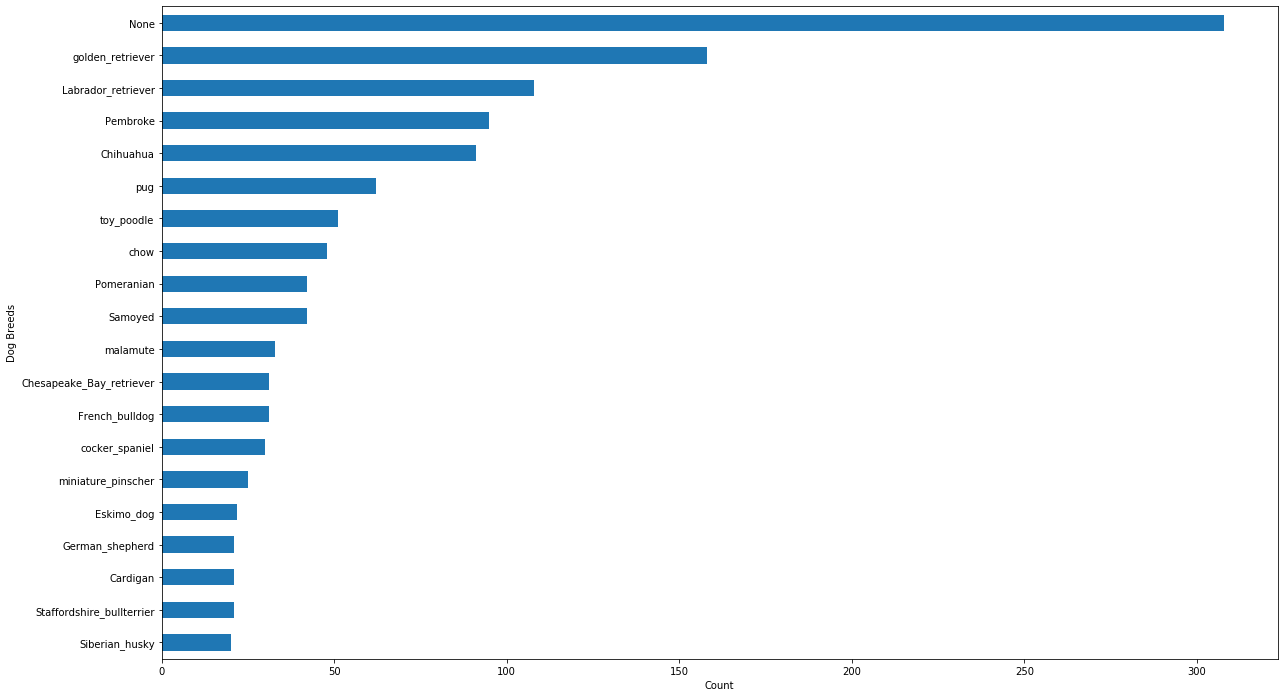

In [259]:
#use horizontal bar chart 
ax1=medrgedDataset.dog_breeds.value_counts().nlargest(20).sort_values().plot(kind = 'barh',figsize=(20,12))
ax1.set_xlabel("Count")
ax1.set_ylabel("Dog Breeds")

* **From the above graph , The most common dog breed in the images where the algorithm has identified a dog in them , is the 'golden_retriever' followed by the 'Labrador_retriever' then 'Pembroke' then 'Chihuahua'**              

##### Insight 2 

Correlation is : (0.91294662741837, 0.0)


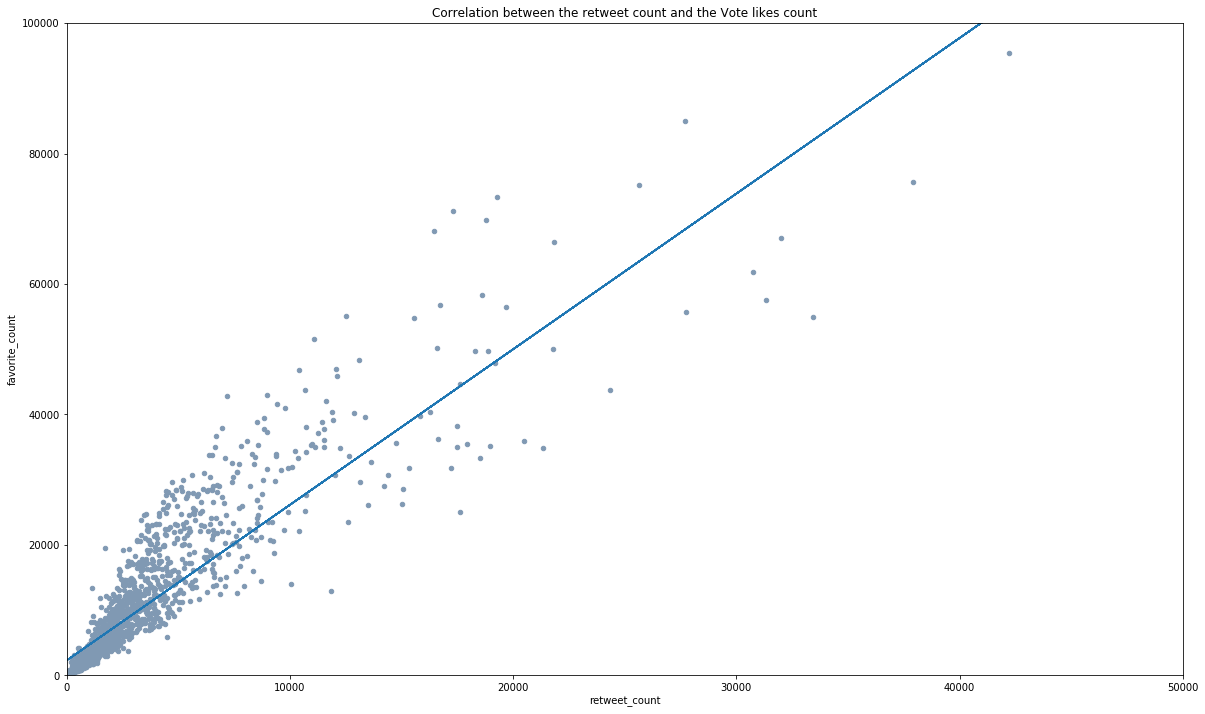

In [260]:
import statsmodels.api as sm
import scipy as sc
#we will plot a relation between the retweet count vs favourite count (likes)
x=medrgedDataset.retweet_count
y=medrgedDataset.favorite_count

#regression expression
model = sm.OLS(medrgedDataset.favorite_count,sm.add_constant(medrgedDataset.retweet_count))
p=model.fit().params
Color = na.array([.5, .6, .7])
#scatter plot data
ax=medrgedDataset.plot(x='retweet_count' , y='favorite_count', kind ='scatter' ,title='Correlation between the retweet count and the Vote likes count',c= na.atleast_2d(Color),figsize=(20,12))


#plot regression line on the same axis
ax.plot(x,p.const + p.retweet_count* x)
ax.set_xlim([0,50000])
ax.set_ylim([0,100000])

print ("Correlation is :",sc.stats.pearsonr(x,y))

* **From the above graph , It seems that there is a strong positive correlation between the number of retweets and count of likes , the correlation computed is 0.912**   

##### Insight 3 

we want to know what is the dominant dog stage in the tweets .<br>
we will select only the tweets with dog stages mentioned within it , since there a lot of tweets with no mentioned dog stages

In [261]:
#filter the dataframe 
df_withDogStage = medrgedDataset.query('dog_stage != "None"')

In [262]:
df_withDogStage.dog_stage.value_counts()

pupper      212
doggo        63
puppo        23
multiple      8
floofer       8
Name: dog_stage, dtype: int64

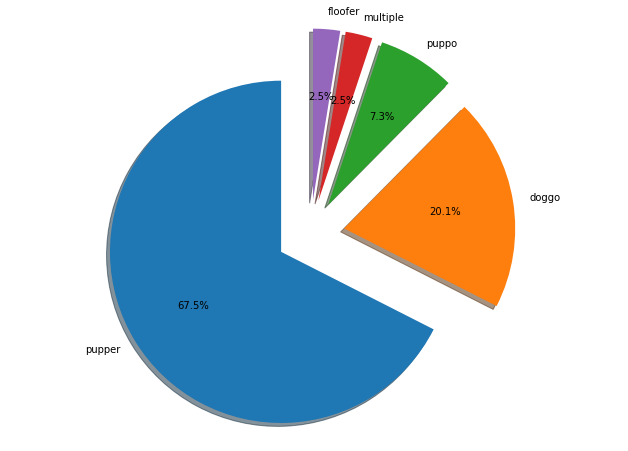

In [265]:
#Create a pie chart with percentage labels using matplotlib
labels = ['pupper','doggo', 'puppo','multiple','floofer']
sizes = df_withDogStage.dog_stage.value_counts()
explode = (0.2, 0.2, 0.2, 0.2, 0.2)  

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig2.set_size_inches(11,8)
plt.show()

* **From the above graph , pupper has the highst percentage in the tweets almost 70 % while the lowest percentage is 2.6 % for floofer and also for multiple dog stages**  

##### Insight 4

we will group the data by the year of the tweet 

In [266]:
#group data by the year
groupedDataByYear = medrgedDataset.groupby(medrgedDataset.timestamp.dt.year)

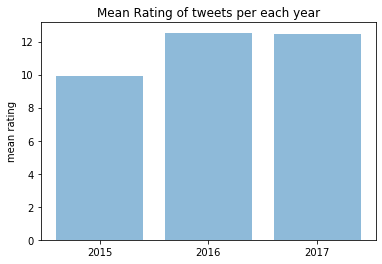

In [267]:
ratingsMean = []
for group_name, df_group in groupedDataByYear:
    ratingsMean.append(df_group.rating_numerator.mean())

objects = ('2015','2016','2017')
y_pos=[1,2,3]
performance = na.array(ratingsMean)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean rating')
plt.title('Mean Rating of tweets per each year')

plt.show()

* **From the above graph , 2015 year has the lowest mean rating , while 2016 has the highst mean rating which is over 12**  

we will get the relation between the rating and the number of retweets in each period as follow :

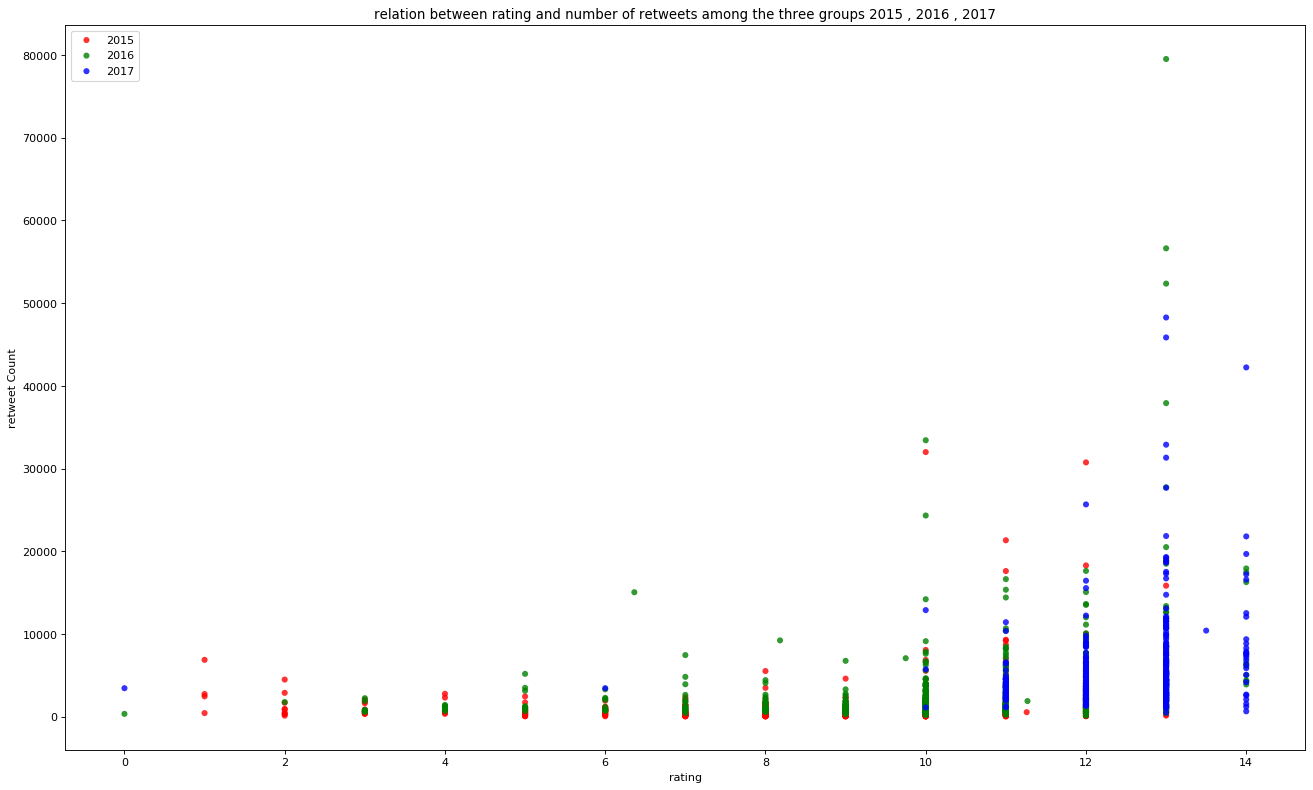

In [268]:
groupsList = []
for group_name, df_group in groupedDataByYear:
    x = df_group.query('rating_numerator<20')['rating_numerator'] #we want to eliminate outliers from plotting on the graph
    y = df_group.query('rating_numerator<20')['retweet_count']
    group  = (x,y)
    groupsList.append(group)
    



data = (groupsList[0],groupsList[1], groupsList[2])
colors = ("red", "green", "blue")
groups = ("2015", "2016", "2017")

# Create plot
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('relation between rating and number of retweets among the three groups 2015 , 2016 , 2017')
plt.legend(loc=2)
plt.ylabel('retweet Count')
plt.xlabel('rating')
plt.show()

* **From the above graph , There is a slight direct relation between the rating and the number of retweets , and this appears especially in tweets written in 2017**  

##### Insight 5

we want to know the most popular dog names 

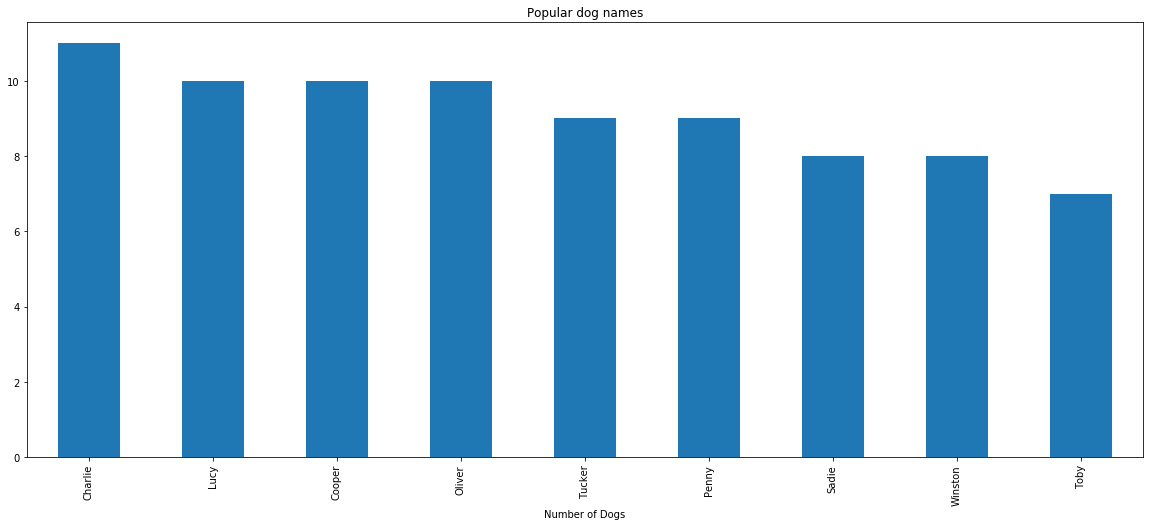

In [269]:
#from the [1:10] we eliminated because it none 
medrgedDataset.name.value_counts()[1:10].plot(kind='bar', figsize=(20,8), title='Popular dog names').set_xlabel("Number of Dogs");

* **From the above graph , Charlie is the most popular name with 11 times repetition , followed by oliver , Lucy and cooper each of 10times repetition**  

### References

The references to the work done in this dataset is:

* Udacity Lessons
* www.geeksforgeeks.org
* www.stackoverflow.com
* Pandas official documentation
* Matplotlib official documentation